<a href="https://colab.research.google.com/github/changsin/MIU_ML/blob/main/notebooks/10.LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LDA (Linear Discriminant Analysis)

LDA (Linear Discriminant Analysis) is a supervised learning algorithm for classification tasks. The goal of LDA is to reduce datasets into a lower-dimensional space with good class separability. For this reason, LDA is often compared and confused with PCA (Principal Component Analysis).




## Similarities
- Both reduce dimensionality
- Both try to find new dimensions in order of importance:
    - PCA: in the order of most variation
    - LDA: in the order of most variation between categories

## Differences

| PCA | LDA  |
| --- | --- |
| unsupervised | supervised |


## Math

### 1. Within-class scatter matrix

$ S_B = \sum\limits_c S_c $

where

$ S_c = \sum\limits_{i \in c} (x_i - \bar x_c)\cdot(x_i - \bar x_c)^T $


### 2. Between-class scatter matrix
$ S_B = \sum\limits_{c} n_c \cdot (\bar x_c - \bar x)\cdot(\bar x_c - \bar x)^T $

### 3. Eigenvalues and Eigenvectors
$ S_W^{-1} S_B $


## Algorithm
[source](https://www.mygreatlearning.com/blog/linear-discriminant-analysis-or-lda/)
1. Compute mean vectors of each class of dependent variable
2. Compute within class ($ S_W $) and between-class ($ S_B $) scatter matrices
3. Compute eigenvalues and eigenvector for $ S_W $ and $ S_B $ - $ S_W^{-1} S_B $
4. Sort the eigenvalues in descending order
5. Select the first k eigenvalues that will be the new k dimensions (linear discriminants)
6. Creates a new matrix containing eigenvectors that map to the k eigenvalues
7. Transform the orignal n dimensional data points into k dimensions (= projections with a dot product)




Shape of X: (150, 4)
Shape of transformed X: (150, 2)


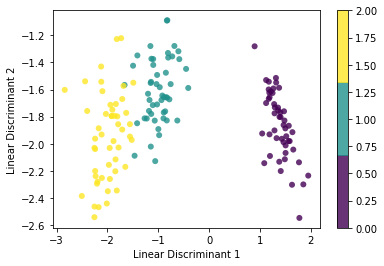

In [1]:
# LDA (Linear Discriminant Analysis) In Python - ML From Scratch 14 - Python Tutorial
# https://youtu.be/9IDXYHhAfGA
# https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/lda.py

import numpy as np


class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None  # store eigenvectors we compute

    def fit(self, X, y):
        # index 0 is the number of samples
        # index 1 is the number of features
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)^2 )

        # Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)^2 )

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c] # get the samples of this label
            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvalues high to low
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0 : self.n_components]

    # get the new features we project
    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn import datasets

    data = datasets.load_iris()
    X, y = data.data, data.target

    # Project the data onto the 2 primary linear discriminants
    lda = LDA(2)
    lda.fit(X, y)
    X_projected = lda.transform(X)

    print("Shape of X:", X.shape)
    print("Shape of transformed X:", X_projected.shape)

    x1, x2 = X_projected[:, 0], X_projected[:, 1]

    plt.scatter(
        x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

    plt.xlabel("Linear Discriminant 1")
    plt.ylabel("Linear Discriminant 2")
    plt.colorbar()
    plt.show()